# attention mechanism for eeg
MD

datasets from here: https://mindbigdata.com/opendb/index.html

directory has a `/datasets` folder containing the uncompressed `EP1.01.txt` file from the above link

In [69]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import random
from numpy import dot
from scipy.special import softmax
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib.pylab as plt

In [70]:
# cgpt fct to get x subset from big file
lines = 1*1400
header = "id	event	device	channel	code	size	data\n"

def write_lines(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        outfile.write(header)
        for i, line in enumerate(infile):
            if i >= lines:  # Stop after 500 lines
                break
            outfile.write(line)

input_file = 'datasets/EP1.01.txt'
output_file = 'small.txt'
write_lines(input_file, output_file)


In [71]:
# convert .txt to dataframe
df = pd.read_csv('small.txt', sep="\t")

In [72]:
df.head()

,id,event,device,channel,code,size,data
0,67635,67635,EP,AF3,6,260,"4395.384615,4382.564102,4377.435897,4387.17948..."
1,67636,67635,EP,F7,6,260,"4489.230769,4475.384615,4474.358974,4486.66666..."
2,67637,67635,EP,F3,6,260,"4538.461538,4528.717948,4524.615384,4526.15384..."
3,67638,67635,EP,FC5,6,260,"4207.692307,4205.641025,4200.512820,4194.35897..."
4,67639,67635,EP,T7,6,260,"4497.948717,4498.461538,4494.871794,4497.94871..."


In [73]:
# get single sample from dataset
curr = df[df['event'] == 67635].reset_index(drop=True)


In [74]:
curr.head()

,id,event,device,channel,code,size,data
0,67635,67635,EP,AF3,6,260,"4395.384615,4382.564102,4377.435897,4387.17948..."
1,67636,67635,EP,F7,6,260,"4489.230769,4475.384615,4474.358974,4486.66666..."
2,67637,67635,EP,F3,6,260,"4538.461538,4528.717948,4524.615384,4526.15384..."
3,67638,67635,EP,FC5,6,260,"4207.692307,4205.641025,4200.512820,4194.35897..."
4,67639,67635,EP,T7,6,260,"4497.948717,4498.461538,4494.871794,4497.94871..."


In [75]:
# convert 'data' column into 2D array - IGNORE THIS CELL
# datapts = np.array(curr['data'].apply(lambda x: [x]).to_list())
# for d in datapts:
#     d = list(map(float, d[0].split(',')))
#     print(d)


In [76]:
# convert 'data' column into 2D array and transpose
datapts = np.transpose(np.array(curr['data'].apply(lambda x: list(map(float, x.split(',')))).to_list()))
print(datapts)


[[4395.384615 4489.230769 4538.461538 ... 4682.051282 3989.23077
  4078.461538]
 [4382.564102 4475.384615 4528.717948 ... 4667.179487 3983.589744
  4062.564102]
 [4377.435897 4474.358974 4524.615384 ... 4662.051282 3987.692308
  4055.897435]
 ...
 [4384.615384 4484.615384 4524.615384 ... 4630.25641  3990.769231
  4052.820512]
 [4385.641025 4483.076923 4531.282051 ... 4631.282051 3989.23077
  4058.974358]
 [4390.76923  4487.692307 4531.282051 ... 4640.       4014.871794
  4070.76923 ]]


# attention mechanism
src: https://machinelearningmastery.com/the-attention-mechanism-from-scratch/

In [77]:
# check size for weight matrix
print(len(datapts[0]))

14


In [78]:
# stacking the word embeddings into a single array
words = datapts

# generating the weight matrices
random.seed(42)
v_size = 14
W_Q = random.randint(v_size, size=(v_size, v_size))
W_K = random.randint(v_size, size=(v_size, v_size))
W_V = random.randint(v_size, size=(v_size, v_size))

# generating the queries, keys and values
Q = words @ W_Q
K = words @ W_K
V = words @ W_V

# scoring the query vectors against all key vectors
scores = Q @ K.transpose()

# computing the weights by a softmax operation
weights = softmax(scores / K.shape[1] ** 0.5, axis=1)

# computing the attention by a weighted sum of the value vectors
attention = weights @ V

print(attention)

[[412430.256356 509117.435834 331994.871754 ... 363452.820464
  516427.692242 377789.230719]
 [412430.256356 509117.435834 331994.871754 ... 363452.820464
  516427.692242 377789.230719]
 [412430.256356 509117.435834 331994.871754 ... 363452.820464
  516427.692242 377789.230719]
 ...
 [412430.256356 509117.435834 331994.871754 ... 363452.820464
  516427.692242 377789.230719]
 [412430.256356 509117.435834 331994.871754 ... 363452.820464
  516427.692242 377789.230719]
 [412430.256356 509117.435834 331994.871754 ... 363452.820464
  516427.692242 377789.230719]]


# normalized data
using normalized data to better see attention mech

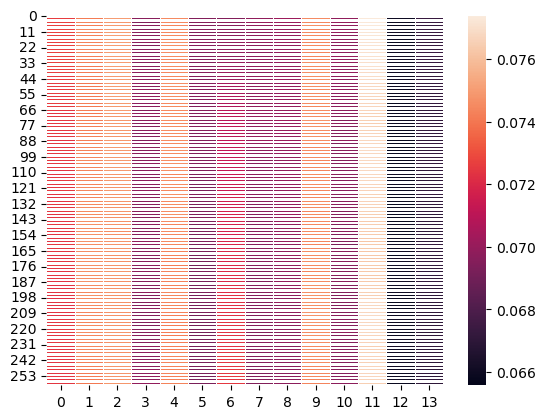

In [83]:
normed_matrix = normalize(datapts, axis=1, norm='l1')

ax = sns.heatmap(normed_matrix, linewidth=0.5)
plt.show()

In [80]:
# stacking the word embeddings into a single array
words = normed_matrix

# generating the weight matrices
random.seed(42)
v_size = 14
W_Q = random.randint(v_size, size=(v_size, v_size))
W_K = random.randint(v_size, size=(v_size, v_size))
W_V = random.randint(v_size, size=(v_size, v_size))

# generating the queries, keys and values
Q = words @ W_Q
K = words @ W_K
V = words @ W_V

# scoring the query vectors against all key vectors
scores = Q @ K.transpose()

# computing the weights by a softmax operation
weights = softmax(scores / K.shape[1] ** 0.5, axis=1)

# computing the attention by a weighted sum of the value vectors
attention = weights @ V

print(attention)

[[6.7954255  8.39131232 5.47027047 ... 5.99376978 8.51216436 6.21708299]
 [6.79542551 8.39131233 5.47027047 ... 5.99376981 8.51216438 6.21708295]
 [6.79542551 8.39131235 5.47027046 ... 5.99376983 8.51216439 6.21708291]
 ...
 [6.79542553 8.39131246 5.47027041 ... 5.99377    8.51216449 6.21708259]
 [6.79542553 8.39131244 5.47027042 ... 5.99376997 8.51216448 6.21708265]
 [6.79542553 8.39131244 5.47027041 ... 5.99376997 8.51216448 6.21708264]]


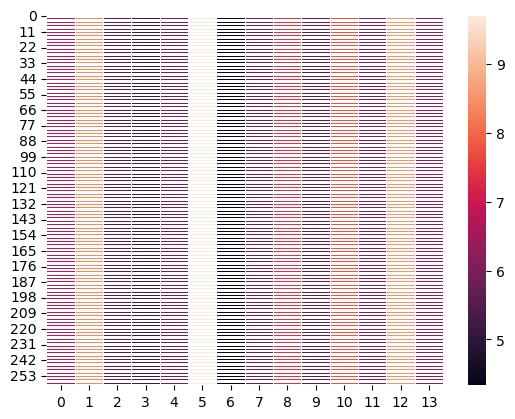

In [81]:

ax = sns.heatmap(attention, linewidth=0.5)
plt.show()

In [82]:
# example attention src code

# encoder representations of four different words
word_1 = array([1, 0, 0])
word_2 = array([0, 1, 0])
word_3 = array([1, 1, 0])
word_4 = array([0, 0, 1])

# stacking the word embeddings into a single array
words = array([word_1, word_2, word_3, word_4])

# generating the weight matrices
random.seed(42)
W_Q = random.randint(3, size=(3, 3))
W_K = random.randint(3, size=(3, 3))
W_V = random.randint(3, size=(3, 3))

# generating the queries, keys and values
Q = words @ W_Q
K = words @ W_K
V = words @ W_V

# scoring the query vectors against all key vectors
scores = Q @ K.transpose()

# computing the weights by a softmax operation
weights = softmax(scores / K.shape[1] ** 0.5, axis=1)

# computing the attention by a weighted sum of the value vectors
attention = weights @ V

print(attention)

[[0.98522025 1.74174051 0.75652026]
 [0.90965265 1.40965265 0.5       ]
 [0.99851226 1.75849334 0.75998108]
 [0.99560386 1.90407309 0.90846923]]
